## Lead Scoring Case Study

### Problem Statement
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)

In [2]:
# read csv file

lead_df=pd.read_csv('Leads.csv')

## Data Understanding

In [3]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#check no. of rows and no. of columns

lead_df.shape

(9240, 37)

In [5]:
#checking the datatype of each column present

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#check numerical columns of the dataset

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**High data variance is observed in a few columns**

In [7]:
lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# lets check for duplicates in prospect Id and lead number as they each seem to have unique values

lead_df.duplicated(subset='Prospect ID').sum()


0

In [9]:
lead_df.duplicated(subset='Lead Number').sum()

0

## Data Cleaning and Processing

In [10]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
lead_df.value_counts()

Prospect ID                           Lead Number  Lead Origin              Lead Source     Do Not Email  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Last Activity  Country    Specialization           How did you hear about X Education  What is your current occupation  What matters most to you in choosing a course  Search  Magazine  Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  Through Recommendations  Receive More Updates About Our Courses  Tags                                 Lead Quality       Update me on Supply Chain Content  Get updates on DM Content  Lead Profile    City                Asymmetrique Activity Index  Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score  I agree to pay the amount through cheque  A free copy of Mastering The Interview  Last Notable Activity
000104b9-23e4-4ddc-8caa-8629fe8ad7f4  654525       API                      Organic Search  No            No   

In [12]:
#checking the if the data in each columns is balanced or not and further we can decide to analyse them or not

lead_check=lead_df.iloc[:,2:]
for i in lead_check:
    print(lead_check[i].value_counts(), '\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5

In [13]:
#check column by column about the importance to be given to not analyse certain unimportant data as the margins are huge and unbalanced

drop_df=['Prospect ID' , 'Lead Number' , 'Do Not Email' ,'Do Not Call' ,'What matters most to you in choosing a course' ,
        'Search' ,'Magazine' ,'Newspaper Article' ,'X Education Forums' , 'Newspaper' ,'Digital Advertisement',
        'Through Recommendations' ,'Receive More Updates About Our Courses' ,'Update me on Supply Chain Content',
        'Get updates on DM Content' ,'I agree to pay the amount through cheque']

In [14]:
#cleaning cols that have select as seen in the unique values tab and replacing them to NaN

lead_df=lead_df.replace('Select', np.nan)

In [15]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**All the select values have to replaced with NaN**

### Checking null values

In [16]:
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [17]:
#check percentage missing values

round(lead_df.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [18]:
#drop cols with more than 45% missing values

round(lead_df.isnull().mean()*100,2)>=45

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [19]:
lead_df.drop(columns=['How did you hear about X Education' , 'Lead Quality' ,'Lead Profile' ,'Asymmetrique Activity Index',
                    'Asymmetrique Profile Index' ,'Asymmetrique Activity Score','Asymmetrique Profile Score'] , inplace=True)


In [20]:
lead_df.shape

(9240, 30)

In [21]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Clean values before analysis

### Lead origin

In [22]:
#NULL values check

lead_df['Lead Origin'].isnull().sum()

0

### Lead source

In [23]:
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
#NULL values check

lead_df['Lead Source'].isnull().sum()

36

In [25]:
#check mode to replace the null values with

lead_df['Lead Source'].mode()

0    Google
dtype: object

In [26]:
# clean the values 

lead_df['Lead Source']=lead_df['Lead Source'].replace('google','Google')

# Replace null values with mode

lead_df['Lead Source']=lead_df['Lead Source'].replace(np.nan , 'Google')

#clubbing low occuring values to others

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')




### Last activity

In [27]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [28]:
#NULL values check

lead_df['Last Activity'].isnull().sum()

103

In [29]:
#check mode to replace null values with

lead_df['Last Activity'].mode()

0    Email Opened
dtype: object

In [30]:
#replace the null values with mode

lead_df['Last Activity']=lead_df['Last Activity'].replace(np.nan , 'Email Opened')

#clubbing low occuring valus to others

lead_df['Last Activity']=lead_df['Last Activity'].replace(['Unreachable' ,'Unsubscribed','Had a Phone Conversation',
                                                          'Approached upfront','View in browser link Clicked','Email Received',
                                                          'Email Marked Spam','Visited Booth in Tradeshow',
                                                           'Resubscribed to emails'],'Others')


### Country

In [31]:
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

### Specialization

In [32]:
lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [33]:
#NULL values check

lead_df['Specialization'].isnull().sum()

3380

In [34]:
# club the last 3 specialization to others
# Also replace the null values to others as it implies that the people have other specialization that are not mentioned

lead_df['Specialization']=lead_df['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

lead_df['Specialization']=lead_df['Specialization'].replace(np.nan ,'Others')

### Tags

In [35]:
lead_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [36]:
#NULL values check

lead_df['Tags'].isnull().sum()

3353

In [37]:
# Clubbing the low occuring values to Others and also add the null values to others

lead_df['Tags']=lead_df["Tags"].replace(['Closed by Horizzon','switched off','Busy','Lost to EINS','Not doing further education',
                                        'Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)',
                                        'wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others',
                                        'Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP',
                                        'Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized',
                                        'Recognition issue (DEC approval)'],'Others')

lead_df['Tags']=lead_df['Tags'].replace(np.nan,'Others')

### City

In [38]:
lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [39]:
lead_df.City.isnull().sum()

3669

In [40]:
# club low occuring values to others and also add the null values to this category

lead_df['City']=lead_df['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

lead_df['City']=lead_df['City'].replace(np.nan, 'Others')

### A free copy of mastering the interview

In [41]:
lead_df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [42]:
lead_df['A free copy of Mastering The Interview'].isnull().sum()

0

### Last notable activity

In [43]:
lead_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [44]:
lead_df['Last Notable Activity'].isnull().sum()

0

In [45]:
# club low occuring vars to others

lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                       'Had a Phone Conversation', 'Email Marked Spam', 'Form Submitted on Website',
                                                                       'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront',
                                                                       'Email Received'], 'Others')

## EDA

### Checking the imbalance in data w.r.t Target Variable i.e., 'Converted'

<AxesSubplot:xlabel='Converted', ylabel='Converted'>

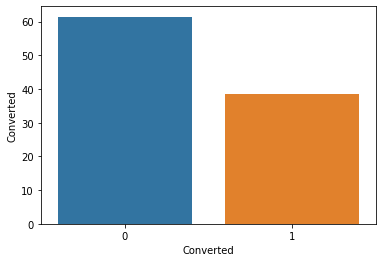

In [46]:
sns.barplot(x="Converted", y="Converted",data=lead_df, estimator=lambda x: len(x) / len(lead_df) * 100)

                 

In [47]:
round(lead_df['Converted'].value_counts(normalize=True)*100 ,2)

0    61.46
1    38.54
Name: Converted, dtype: float64

**The balance in the data is as above with ~38% converted**

In [48]:
#cols not important to analyse

drop_df

['Prospect ID',
 'Lead Number',
 'Do Not Email',
 'Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [49]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Categorcial analysis of data : 
    lead origin , lead source , last activity , country ,specialization ,what is your current occuption ,tags , city ,             A free copy of Mastering The Interview , last notable activity

### Lead Origin

In [50]:
round(lead_df['Lead Origin'].value_counts(normalize=True),2)

Landing Page Submission    0.53
API                        0.39
Lead Add Form              0.08
Lead Import                0.01
Quick Add Form             0.00
Name: Lead Origin, dtype: float64

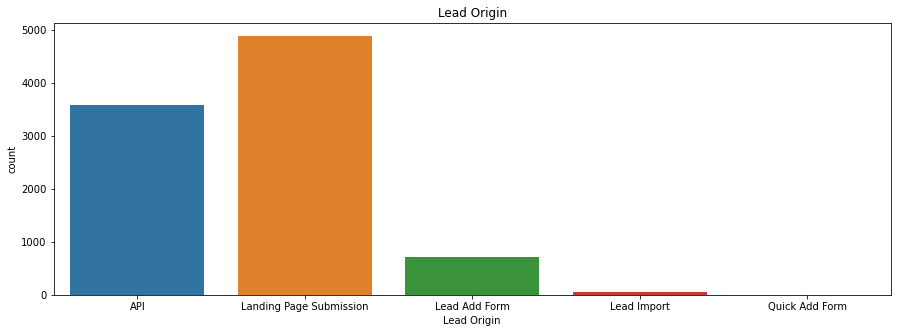

In [51]:
#Univariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Lead Origin'])
plt.title('Lead Origin')
plt.show()

**53% of origin lead is from Landing page submission**

**39% of origin lead is from APi**

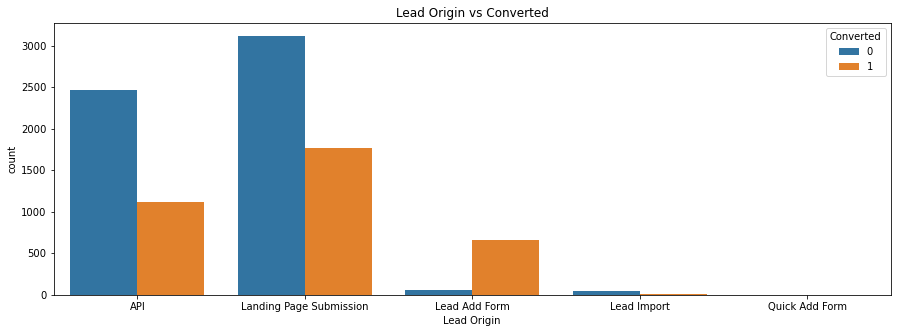

In [52]:
# Bivariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Lead Origin'], hue=lead_df['Converted'])
plt.title('Lead Origin vs Converted')
plt.show()


In [53]:
print(round(pd.crosstab(lead_df['Lead Origin'],lead_df.Converted).apply(lambda x: x/x.sum(),axis=1),2))

Converted                   0     1
Lead Origin                        
API                      0.69  0.31
Landing Page Submission  0.64  0.36
Lead Add Form            0.08  0.92
Lead Import              0.76  0.24
Quick Add Form           0.00  1.00


**Conversion rate is 36% for Landing page submission**

**Conversion rate is 31% for APi**

**Lead add form has more than 90% conversion rate which does not have much leads generated**

### Lead Source

In [54]:
round(lead_df['Lead Source'].value_counts(normalize=True),2)

Google              0.31
Direct Traffic      0.28
Olark Chat          0.19
Organic Search      0.12
Reference           0.06
Welingak Website    0.02
Referral Sites      0.01
Others              0.01
Name: Lead Source, dtype: float64

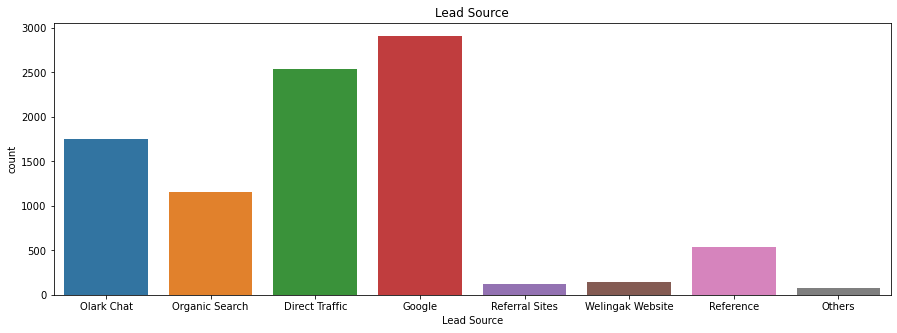

In [55]:
#Univariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Lead Source'])
plt.title('Lead Source')
plt.show()

**31% lead source is from google and 28% from direct traffic**

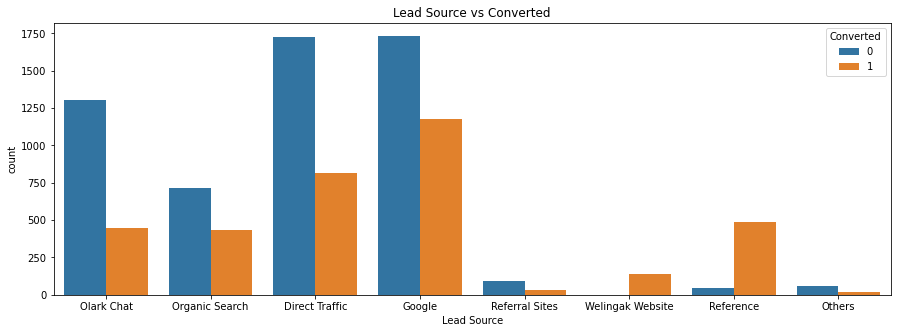

In [56]:
# Bivariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Lead Source'], hue=lead_df['Converted'])
plt.title('Lead Source vs Converted')
plt.show()

In [57]:
print(round(pd.crosstab(lead_df['Lead Source'],lead_df.Converted).apply(lambda x: x/x.sum(),axis=1),2))

Converted            0     1
Lead Source                 
Direct Traffic    0.68  0.32
Google            0.60  0.40
Olark Chat        0.74  0.26
Organic Search    0.62  0.38
Others            0.72  0.28
Reference         0.08  0.92
Referral Sites    0.75  0.25
Welingak Website  0.01  0.99


**40% conversion rate with google and 32% from direct traffic**

**reference has more than 90% conversion rate but does not have more leads generated**

### Last Activity

In [58]:
round(lead_df['Last Activity'].value_counts(normalize=True),2)

Email Opened                 0.38
SMS Sent                     0.30
Olark Chat Conversation      0.11
Page Visited on Website      0.07
Converted to Lead            0.05
Email Bounced                0.04
Email Link Clicked           0.03
Others                       0.02
Form Submitted on Website    0.01
Name: Last Activity, dtype: float64

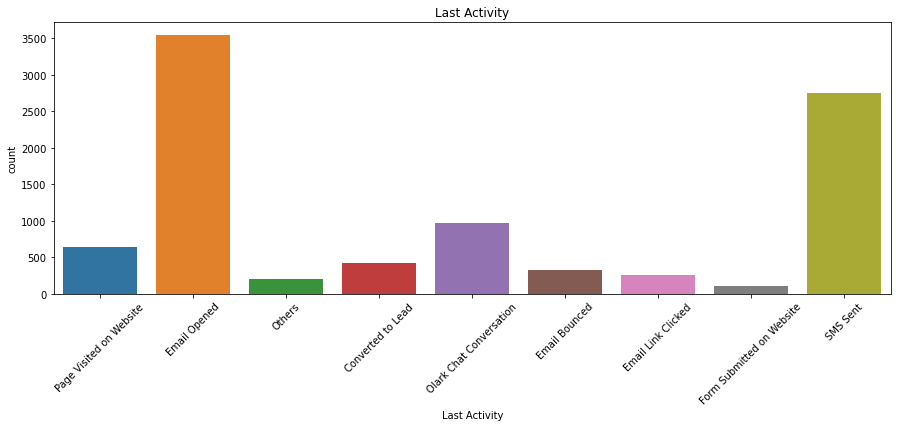

In [59]:
#Univariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Last Activity'])
plt.title('Last Activity')
plt.xticks(rotation=45)
plt.show()

**38% of the last activity is Email Opened**

**30% of the last activity is SMS sent**

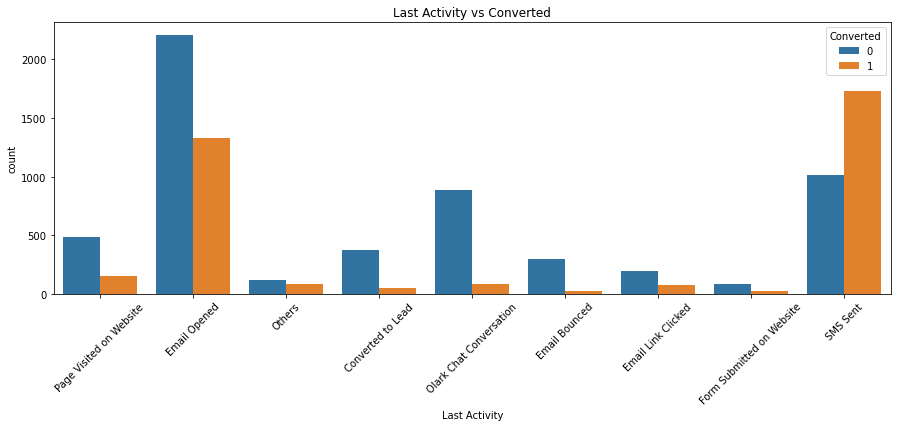

In [60]:
# Bivariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Last Activity'], hue=lead_df['Converted'])
plt.title('Last Activity vs Converted')
plt.xticks(rotation=45)

plt.show()

In [61]:
print(round(pd.crosstab(lead_df['Last Activity'],lead_df.Converted).apply(lambda x: x/x.sum(),axis=1),2))

Converted                     0     1
Last Activity                        
Converted to Lead          0.87  0.13
Email Bounced              0.92  0.08
Email Link Clicked         0.73  0.27
Email Opened               0.62  0.38
Form Submitted on Website  0.76  0.24
Olark Chat Conversation    0.91  0.09
Others                     0.59  0.41
Page Visited on Website    0.76  0.24
SMS Sent                   0.37  0.63


**Conversion rate of Email opened is 38%**

**Conversion rate of SMS sent is 63%**

### Specialization

In [62]:
round(lead_df['Specialization'].value_counts(normalize=True),2)

Others                               0.38
Finance Management                   0.11
Human Resource Management            0.09
Marketing Management                 0.09
Operations Management                0.05
Business Administration              0.04
IT Projects Management               0.04
Supply Chain Management              0.04
Banking, Investment And Insurance    0.04
Media and Advertising                0.02
Travel and Tourism                   0.02
International Business               0.02
Healthcare Management                0.02
Hospitality Management               0.01
E-COMMERCE                           0.01
Retail Management                    0.01
Name: Specialization, dtype: float64

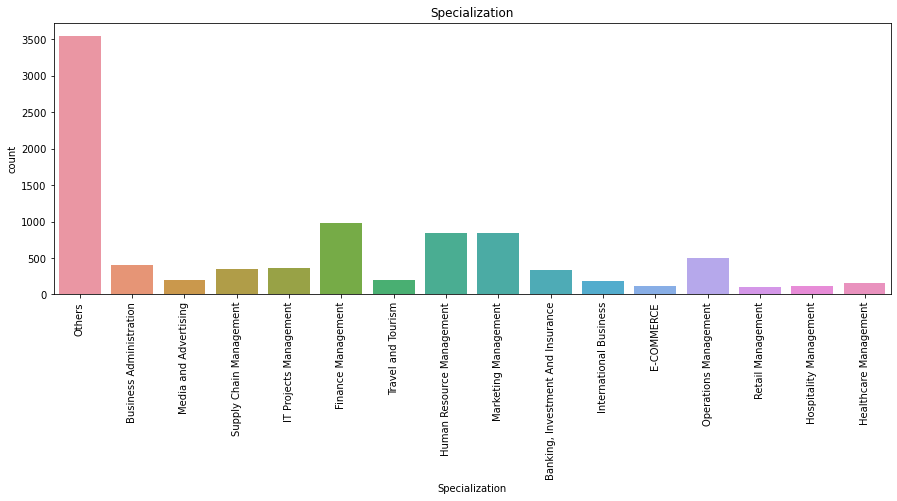

In [63]:
#Univariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Specialization'])
plt.title('Specialization')
plt.xticks(rotation=90)
plt.show()

**38% specialization belongs to other category and 11% belong to the Finance management category**

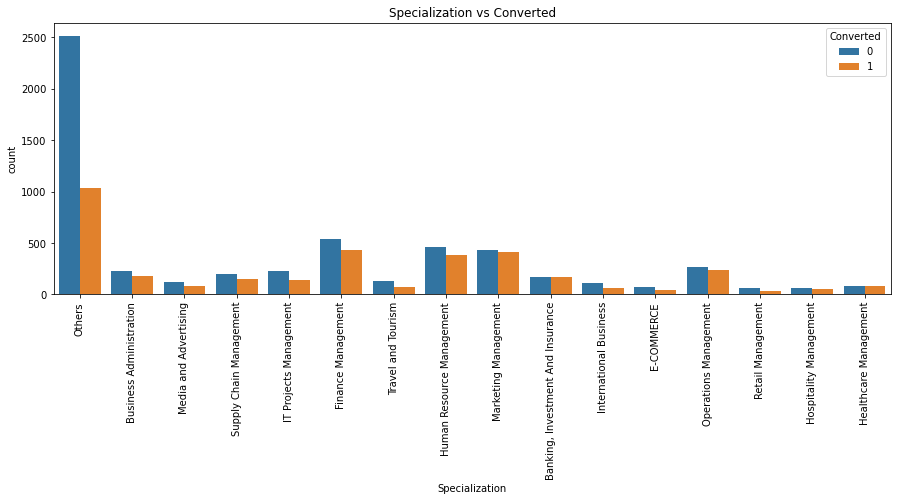

In [64]:
# Bivariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Specialization'], hue=lead_df['Converted'])
plt.title('Specialization vs Converted')
plt.xticks(rotation=90)

plt.show()

In [65]:
print(round(pd.crosstab(lead_df['Specialization'],lead_df.Converted).apply(lambda x: x/x.sum(),axis=1),2))

Converted                             0     1
Specialization                               
Banking, Investment And Insurance  0.51  0.49
Business Administration            0.56  0.44
E-COMMERCE                         0.64  0.36
Finance Management                 0.55  0.45
Healthcare Management              0.50  0.50
Hospitality Management             0.58  0.42
Human Resource Management          0.54  0.46
IT Projects Management             0.62  0.38
International Business             0.64  0.36
Marketing Management               0.51  0.49
Media and Advertising              0.58  0.42
Operations Management              0.53  0.47
Others                             0.71  0.29
Retail Management                  0.66  0.34
Supply Chain Management            0.57  0.43
Travel and Tourism                 0.65  0.35


**Finance management has conversion rate of about 45% , hospitatlity management of about 42% and Human resource of 46%**

### Tags

In [66]:
round(lead_df['Tags'].value_counts(normalize=True),2)

Others                                 0.54
Will revert after reading the email    0.22
Ringing                                0.13
Interested in other courses            0.06
Already a student                      0.05
Name: Tags, dtype: float64

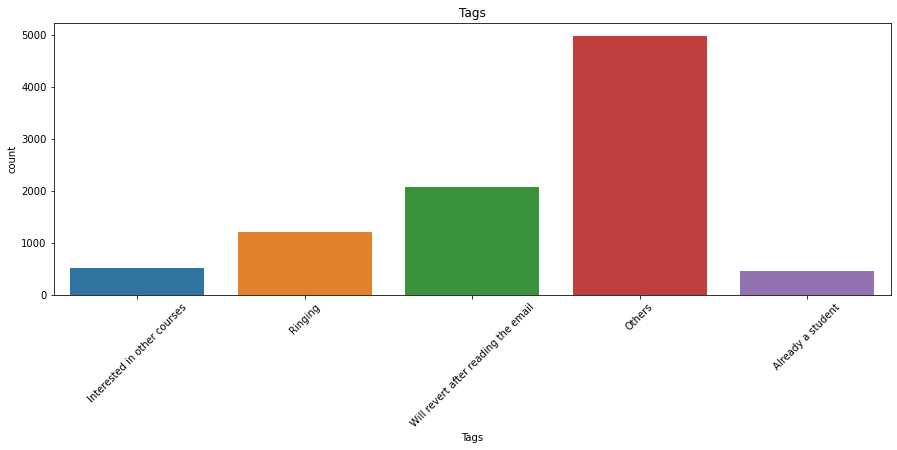

In [67]:
#Univariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Tags'])
plt.title('Tags')
plt.xticks(rotation=45)
plt.show()

**Others has a percentage of 54% while revert after reading email is 22% and RInging is 13%**

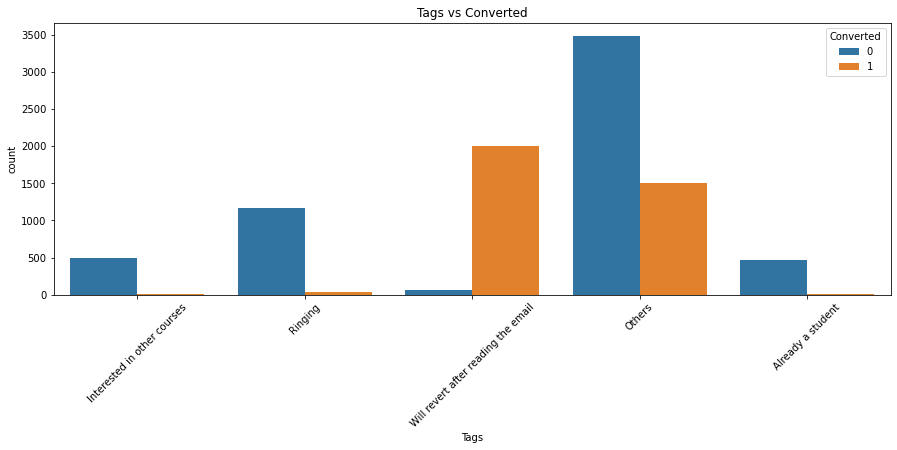

In [68]:
# Bivariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Tags'], hue=lead_df['Converted'])
plt.title('Tags vs Converted')
plt.xticks(rotation=45)

plt.show()

In [69]:
print(round(pd.crosstab(lead_df['Tags'],lead_df.Converted).apply(lambda x: x/x.sum(),axis=1),2))

Converted                               0     1
Tags                                           
Already a student                    0.99  0.01
Interested in other courses          0.97  0.03
Others                               0.70  0.30
Ringing                              0.97  0.03
Will revert after reading the email  0.03  0.97


**Others has a conversion rate of 30% and revert after reading email has 97% conversion rate**

### City

In [70]:
round(lead_df.City.value_counts(normalize=True),2)

Others               0.57
Mumbai               0.35
Thane & Outskirts    0.08
Name: City, dtype: float64

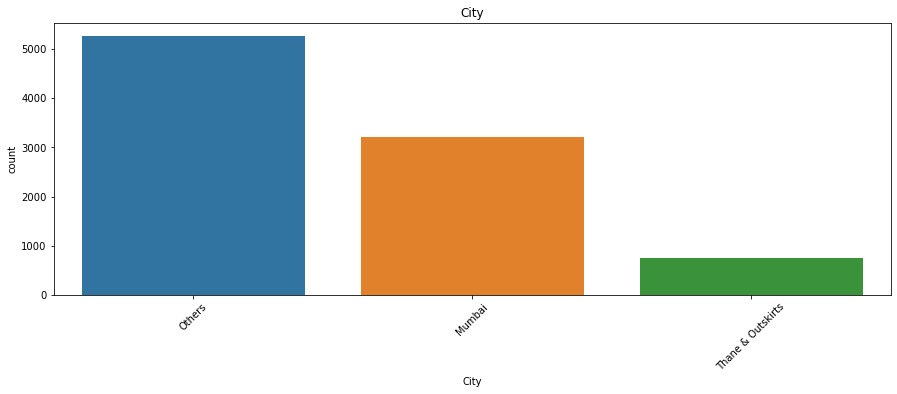

In [71]:
#Univariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['City'])
plt.title('City')
plt.xticks(rotation=45)
plt.show()

**57% belongs to others and 35% alone belongs to mumbai**|

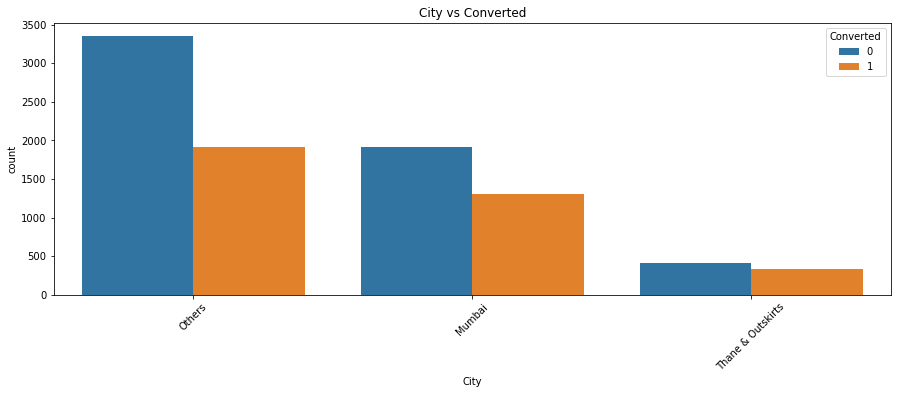

In [72]:
# Bivariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['City'], hue=lead_df['Converted'])
plt.title('City vs Converted')
plt.xticks(rotation=45)

plt.show()

In [73]:
print(round(pd.crosstab(lead_df['City'],lead_df.Converted).apply(lambda x: x/x.sum(),axis=1),2))

Converted             0     1
City                         
Mumbai             0.59  0.41
Others             0.64  0.36
Thane & Outskirts  0.55  0.45


**mumbai has a coversion rate of 41% , others with 36% and thane and outskirts with 45%**

### A free copy of Mastering The Interview  

In [74]:
lead_df['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

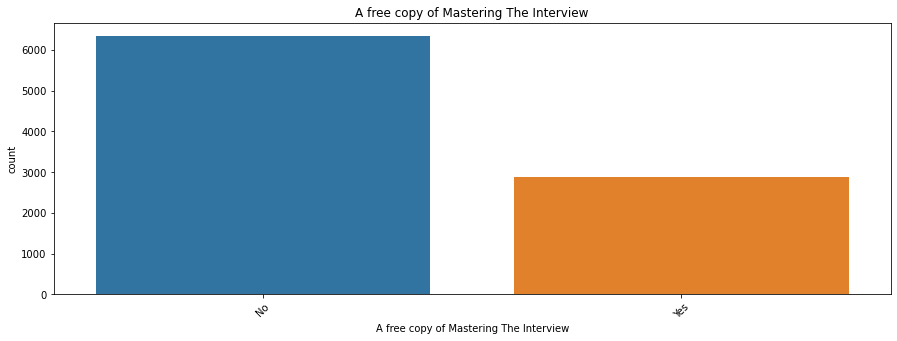

In [75]:
#Univariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')
plt.xticks(rotation=45)
plt.show()

**approx 68% said no to a free copy**

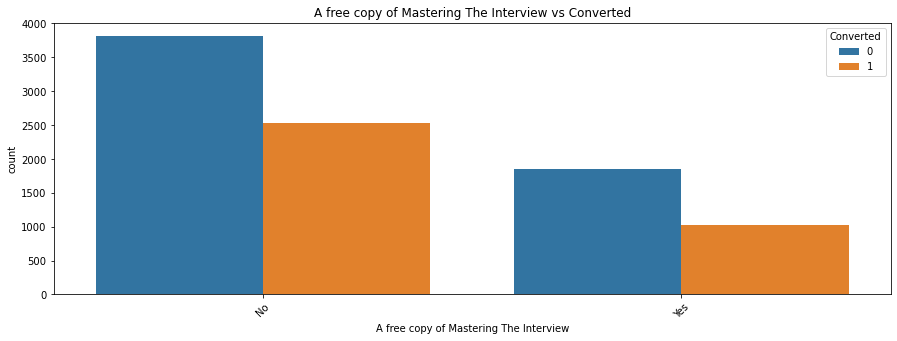

In [76]:
# Bivariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['A free copy of Mastering The Interview'], hue=lead_df['Converted'])
plt.title('A free copy of Mastering The Interview vs Converted')
plt.xticks(rotation=45)

plt.show()

In [77]:
print(round(pd.crosstab(lead_df['A free copy of Mastering The Interview'],lead_df.Converted).apply(lambda x: x/x.sum(),axis=1),2))

Converted                                  0     1
A free copy of Mastering The Interview            
No                                      0.60  0.40
Yes                                     0.64  0.36


**COnversion rate for no is 40% and for yes is 36%**

### Last Notable Activity

In [78]:
round(lead_df['Last Notable Activity'].value_counts(normalize=True),2)

Modified                   0.37
Email Opened               0.31
SMS Sent                   0.24
Page Visited on Website    0.03
Olark Chat Conversation    0.02
Email Link Clicked         0.02
Others                     0.02
Name: Last Notable Activity, dtype: float64

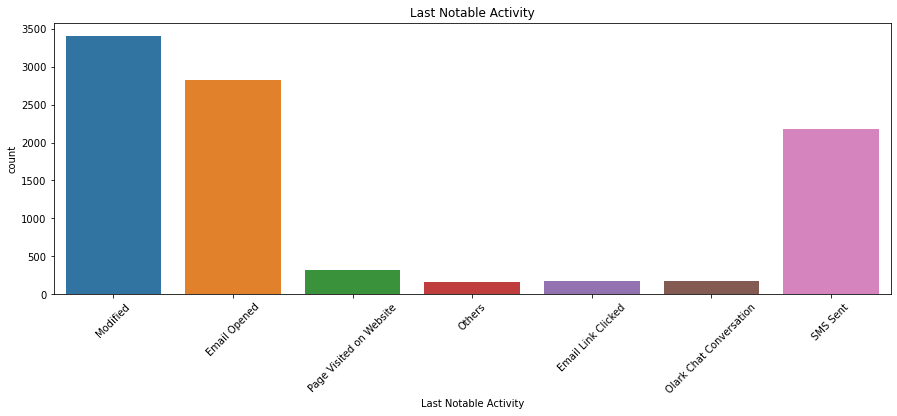

In [79]:
#Univariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Last Notable Activity'])
plt.title('Last Notable Activity')
plt.xticks(rotation=45)
plt.show()

**37% belongs to modified in last notable activity while 31% of them have opened their email**

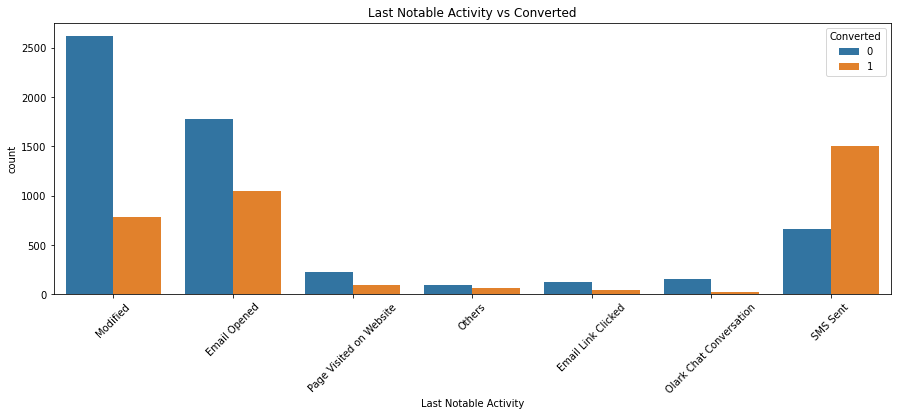

In [80]:
# Bivariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Last Notable Activity'], hue=lead_df['Converted'])
plt.title('Last Notable Activity vs Converted')
plt.xticks(rotation=45)

plt.show()

In [81]:
print(round(pd.crosstab(lead_df['Last Notable Activity'],lead_df.Converted).apply(lambda x: x/x.sum(),axis=1),2))

Converted                   0     1
Last Notable Activity              
Email Link Clicked       0.74  0.26
Email Opened             0.63  0.37
Modified                 0.77  0.23
Olark Chat Conversation  0.86  0.14
Others                   0.61  0.39
Page Visited on Website  0.71  0.29
SMS Sent                 0.31  0.69


**modified has a conversion rate of 23% , email opened with 37% and sms sent with 69%**

### what is your current occupation

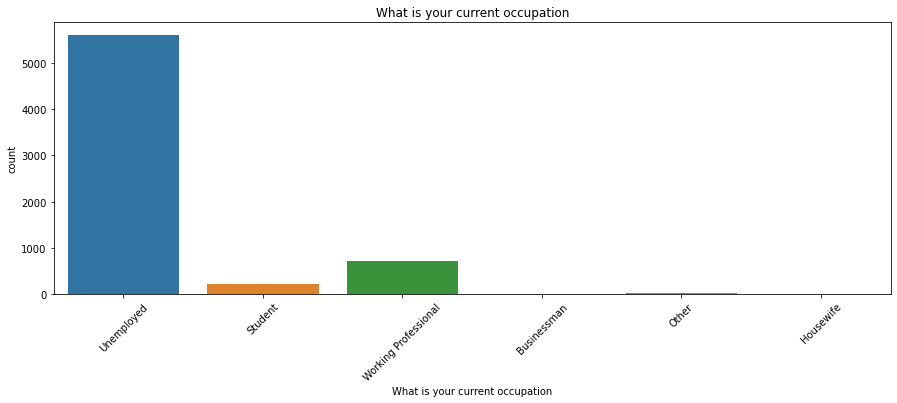

In [82]:
#Univariate analysis

plt.figure(figsize=(15,5))
sns.countplot(lead_df['What is your current occupation'])
plt.title('What is your current occupation')
plt.xticks(rotation=45)
plt.show()

**Majority are unemployed, this is not such an important feature**

## Numerical variable analysis of data
    lead number ,converted , total visits , total time spent on website and page views per visit

In [83]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

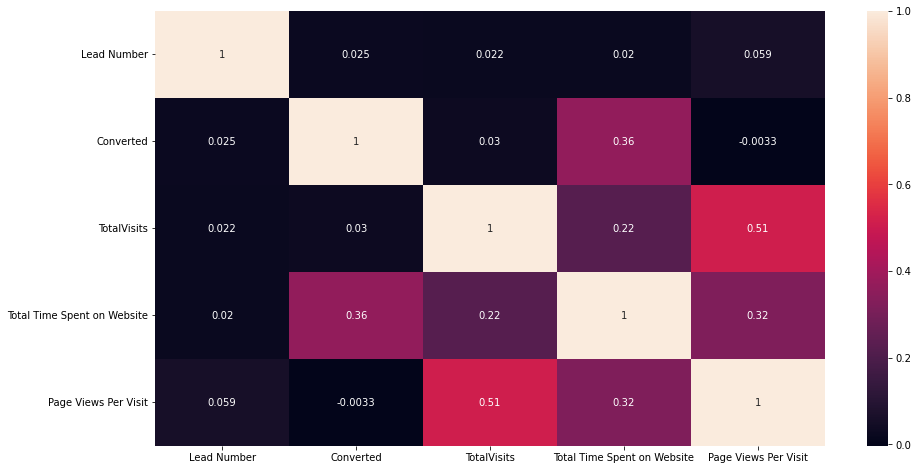

In [84]:
# CHECK CORRELATION BETWEEN NUMERICAL VARS

plt.figure(figsize=(15,8))
sns.heatmap(lead_df.corr(),annot=True)
plt.show()

In [85]:
# analysis on numerical vaariables excluding lead number and target variable 'converted'

lead_numerical = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
lead_numerical.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


**Total visits and page per views seem to have some outliers , lets check**

## Check Outliers

<AxesSubplot:xlabel='Page Views Per Visit'>

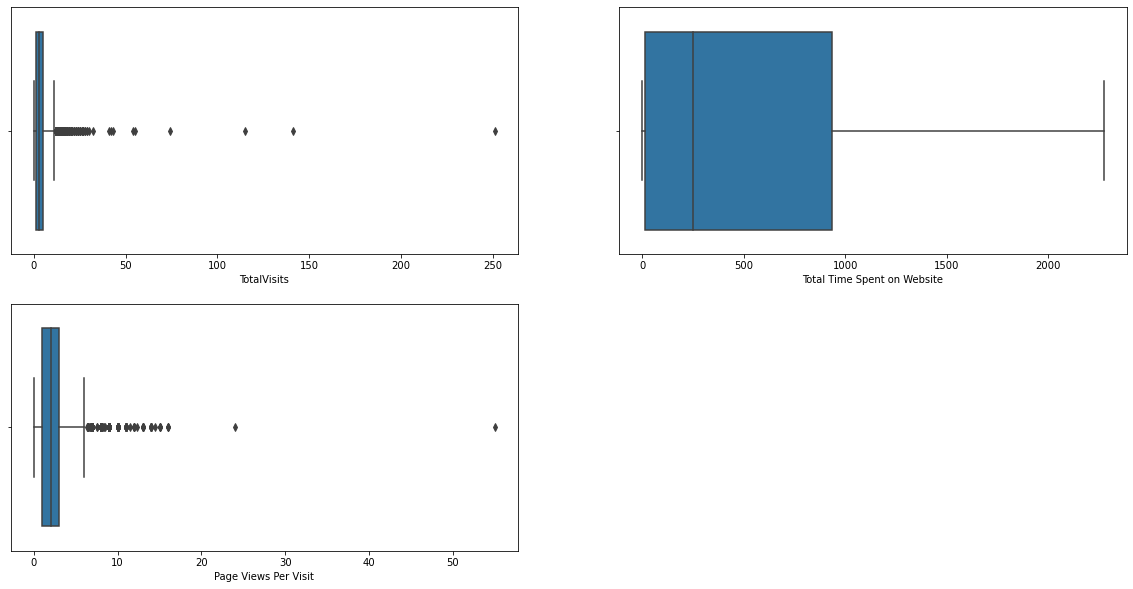

In [86]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(lead_numerical['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(lead_numerical['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(lead_numerical['Page Views Per Visit'])



**Total visits and page views per visit have outliers**

### Handle outliers by capping


In [87]:
Q1 = lead_numerical.quantile(0.25)
Q1

TotalVisits                     1.0
Total Time Spent on Website    12.0
Page Views Per Visit            1.0
Name: 0.25, dtype: float64

In [88]:
Q3 = lead_numerical.quantile(0.75)
Q3

TotalVisits                      5.0
Total Time Spent on Website    936.0
Page Views Per Visit             3.0
Name: 0.75, dtype: float64

In [89]:
IQR=Q3-Q1
IQR

TotalVisits                      4.0
Total Time Spent on Website    924.0
Page Views Per Visit             2.0
dtype: float64

In [90]:
IQR*1.5

TotalVisits                       6.0
Total Time Spent on Website    1386.0
Page Views Per Visit              3.0
dtype: float64

### TotalVisits

In [91]:
#check the summary using describe

round(lead_df['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95 ,0.99,1]),2)


count    9103.00
mean        3.45
std         4.85
min         0.00
25%         1.00
50%         3.00
75%         5.00
90%         7.00
95%        10.00
99%        17.00
100%      251.00
max       251.00
Name: TotalVisits, dtype: float64

In [92]:
# replacing the outlier  (Q3 + 1.5*IQR)=11 with 1.5*IQR=6

lead_df.loc[lead_df['TotalVisits'] > 11, 'TotalVisits'] = 6

Text(0.5, 1.0, 'TotalVisits')

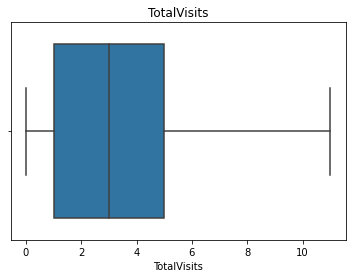

In [93]:
sns.boxplot(lead_df['TotalVisits'])
plt.title('TotalVisits')


**Total visits outliers are handled**

### Page views per visit

In [94]:
#check the summary using describe

round(lead_df['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95 ,0.99,1]),2)

count    9103.00
mean        2.36
std         2.16
min         0.00
25%         1.00
50%         2.00
75%         3.00
90%         5.00
95%         6.00
99%         9.00
100%       55.00
max        55.00
Name: Page Views Per Visit, dtype: float64

In [95]:
# replacing the outlier  (Q3 + 1.5*IQR)=6 with 1.5*IQR=3

lead_df.loc[lead_df['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

Text(0.5, 1.0, 'Page Views Per Visit')

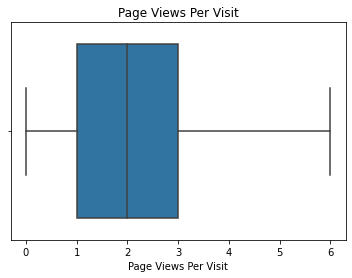

In [96]:
sns.boxplot(lead_df['Page Views Per Visit'])
plt.title('Page Views Per Visit')


**Page views per visit outliers are handled**

## Dropping unnecessary columns which were clubbed earlier in drop_df

In [97]:
drop_df

['Prospect ID',
 'Lead Number',
 'Do Not Email',
 'Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [98]:
#create new dataframe with required cols

newlead_df=lead_df[lead_df.columns[~lead_df.columns.isin(drop_df)]]
newlead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Country                                 6779 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    9240 non-null   obje

In [99]:
# check null values

newlead_df.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                                0
Country                                   2461
Specialization                               0
What is your current occupation           2690
Tags                                         0
City                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [100]:
newlead_df.drop(columns=['Country','What is your current occupation'],inplace=True)

In [101]:
round(newlead_df.isnull().mean()*100,2)

Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [102]:
# delete the rows with null values

newlead_df = newlead_df.dropna(subset=['TotalVisits','Page Views Per Visit'])
newlead_df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [103]:
newlead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Interested in other courses,Others,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Ringing,Others,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Will revert after reading the email,Mumbai,No,Modified


In [104]:
# replace the yes and no values to 1 & 0 in a free copy of mastering the interview

newlead_df['A free copy of Mastering The Interview'].replace({'Yes':1 , 'No':0},inplace=True)

In [105]:
newlead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Interested in other courses,Others,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Ringing,Others,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Will revert after reading the email,Mumbai,0,Modified


In [106]:
newlead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   Tags                                    9103 non-null   object 
 9   City                                    9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   int6

### All cols required for modelling are now cleaned and ready 

## CREATE DUMMIES

In [108]:
newlead_df = pd.get_dummies(newlead_df, drop_first=True)
newlead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [109]:
newlead_df.shape

(9103, 50)

## TRAIN-TEST SPLIT

In [110]:
# load cols to X

X= newlead_df.drop(['Converted'] , axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [111]:
# load converted variable to y

y=newlead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [112]:
# import libraries

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [113]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X ,y ,train_size=0.8 , random_state=100)

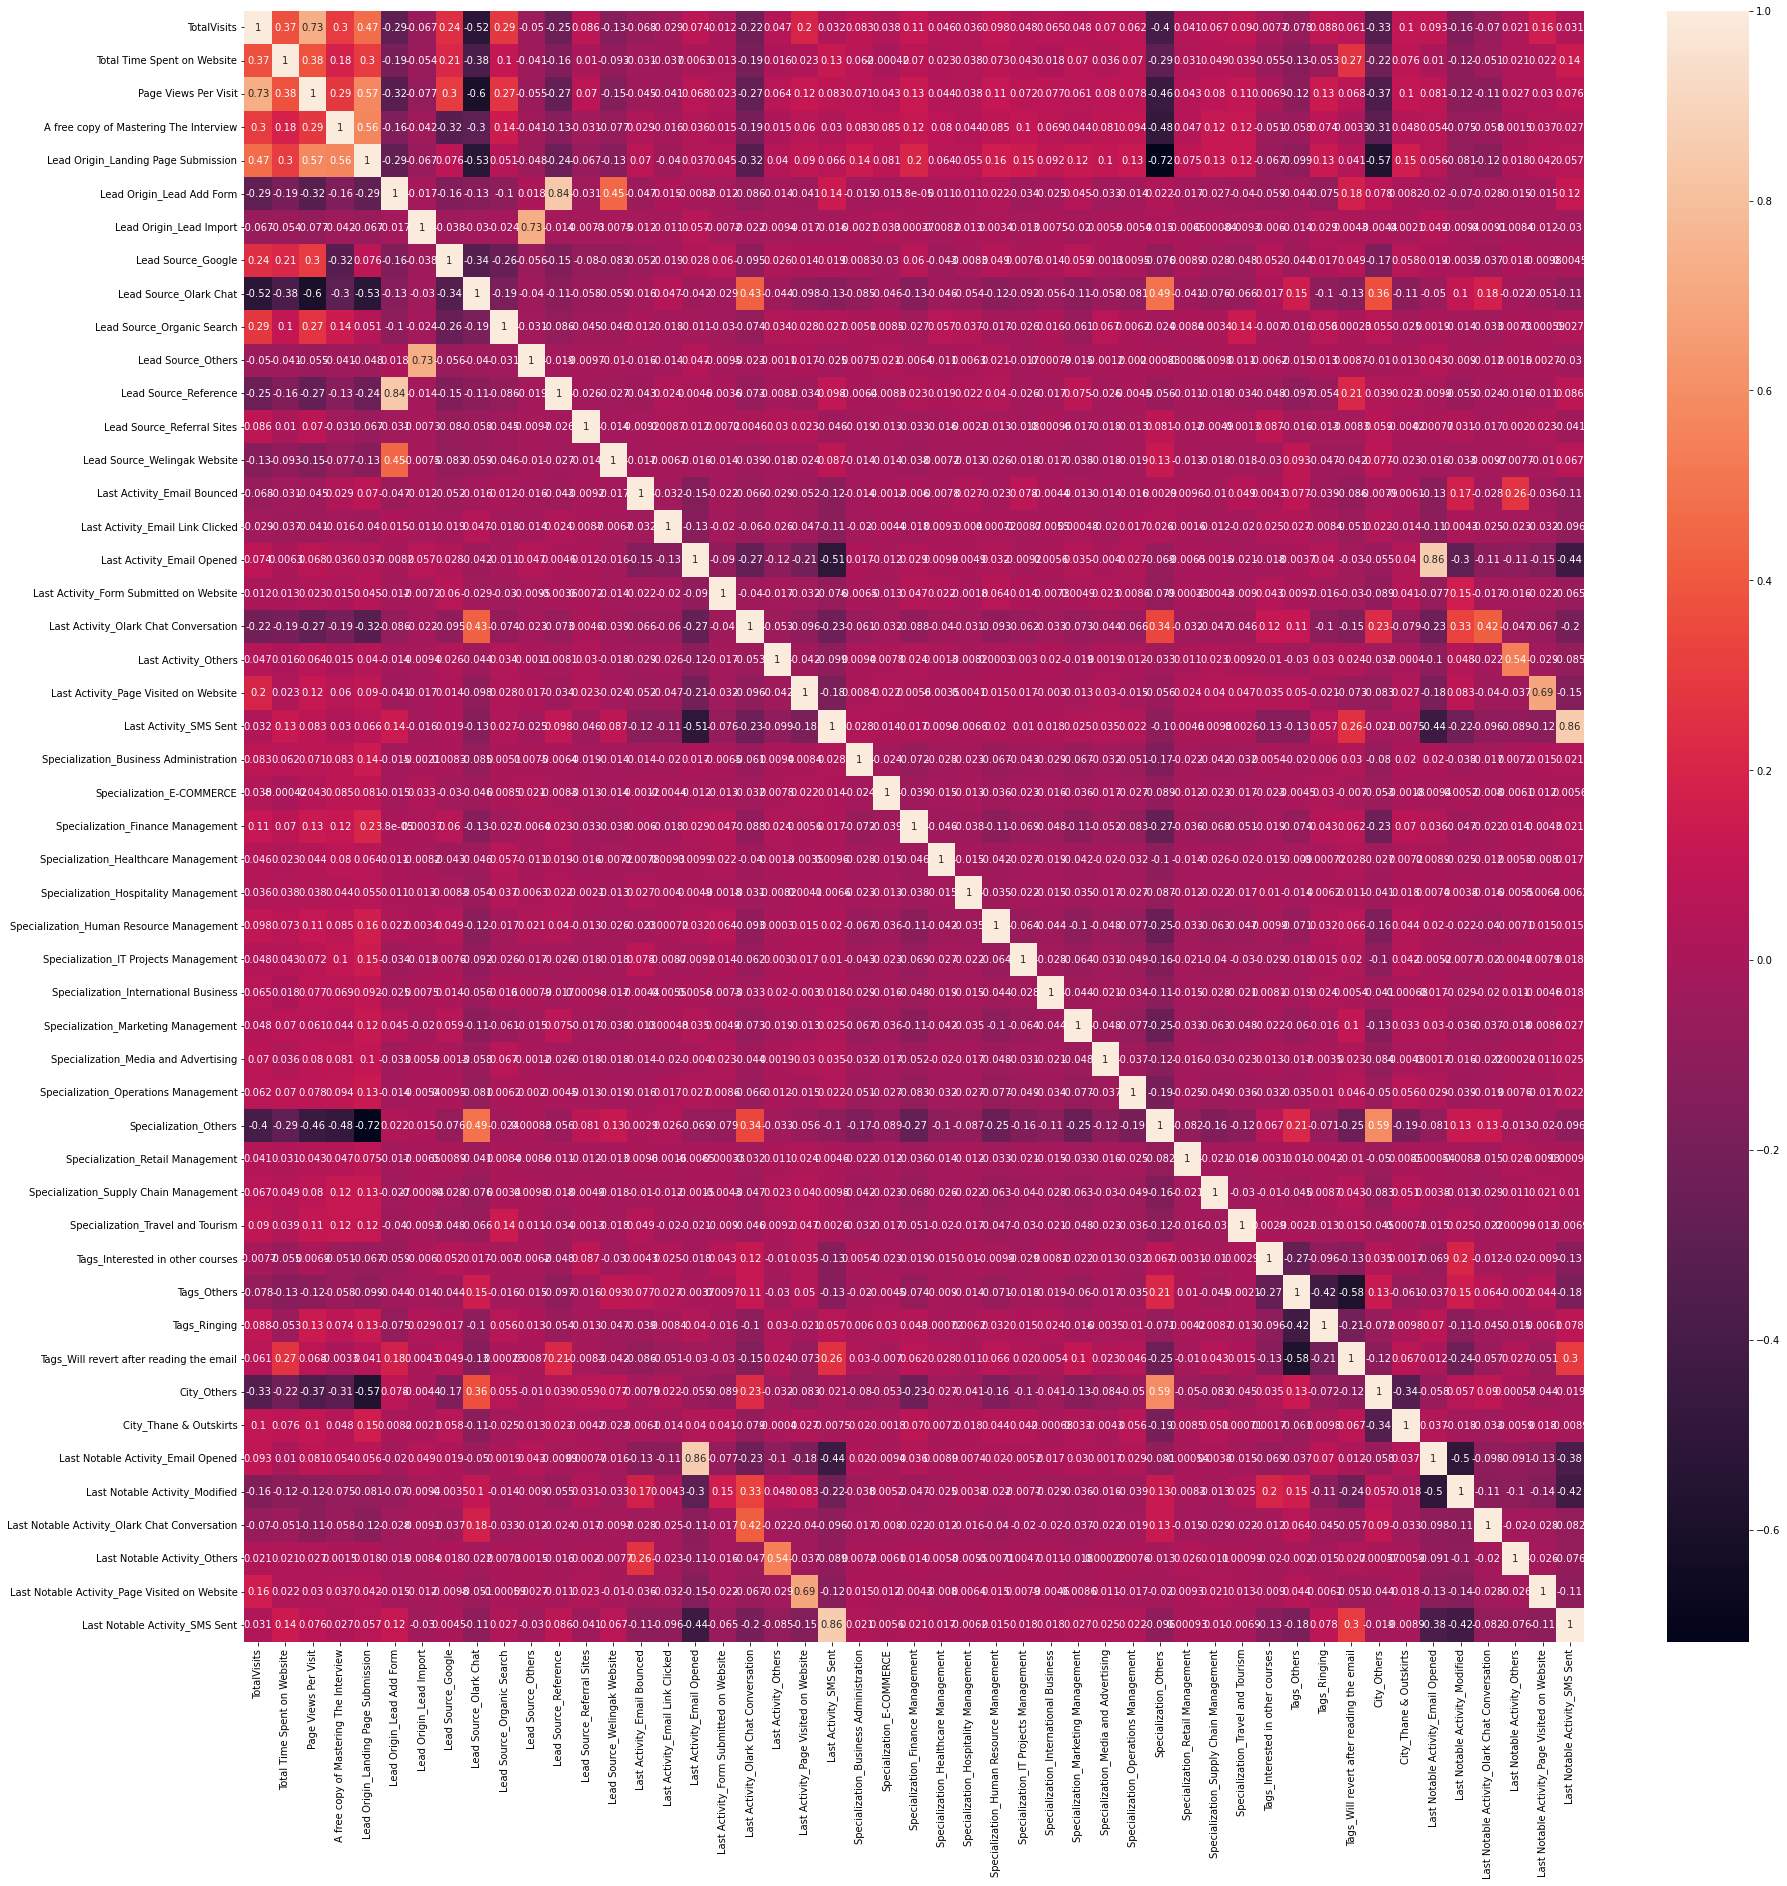

In [114]:
# checking the correlations
plt.figure(figsize=(30,30))
sns.heatmap(data=X_train.corr(),annot=True)
plt.show()

In [115]:
#checking highly correlated values

corr_lead = X_train.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True)

In [116]:
#positive correlated values

corr_df.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df.head(6)

,VAR1,VAR2,Correlation
2123,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.862896
2373,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.857740
544,Lead Source_Reference,Lead Origin_Lead Add Form,0.844642
98,Page Views Per Visit,TotalVisits,0.729415
496,Lead Source_Others,Lead Origin_Lead Import,0.727693
2323,Last Notable Activity_Page Visited on Website,Last Activity_Page Visited on Website,0.692017


In [117]:
#negative correlated values

corr_df.sort_values(by='Correlation', ascending=True, inplace=True)
corr_df.head(6)

,VAR1,VAR2,Correlation
1621,Specialization_Others,Lead Origin_Landing Page Submission,-0.718026
394,Lead Source_Olark Chat,Page Views Per Visit,-0.597803
1998,Tags_Will revert after reading the email,Tags_Others,-0.579584
2013,City_Others,Lead Origin_Landing Page Submission,-0.568112
396,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.526359
392,Lead Source_Olark Chat,TotalVisits,-0.521520


In [118]:
#drop these highly correlated values from the dataframes except for totalvisits

X_train = X_train.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], 1)

X_test = X_test.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], 1)

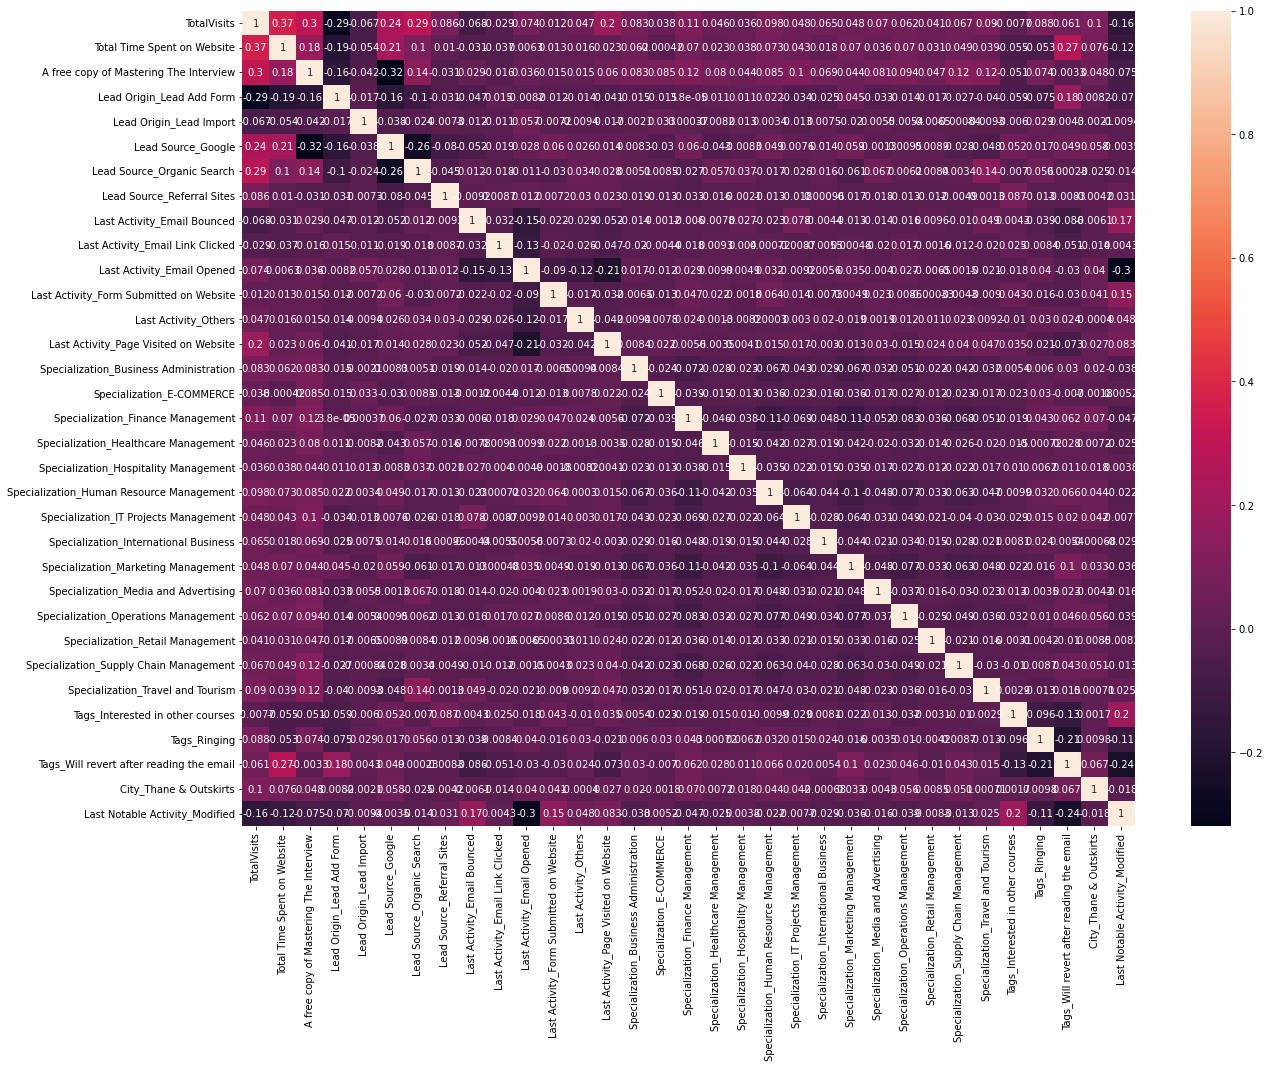

In [119]:
# lets see the heatmap for the same now

plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7282 entries, 9000 to 5734
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               7282 non-null   float64
 1   Total Time Spent on Website               7282 non-null   int64  
 2   A free copy of Mastering The Interview    7282 non-null   int64  
 3   Lead Origin_Lead Add Form                 7282 non-null   uint8  
 4   Lead Origin_Lead Import                   7282 non-null   uint8  
 5   Lead Source_Google                        7282 non-null   uint8  
 6   Lead Source_Organic Search                7282 non-null   uint8  
 7   Lead Source_Referral Sites                7282 non-null   uint8  
 8   Last Activity_Email Bounced               7282 non-null   uint8  
 9   Last Activity_Email Link Clicked          7282 non-null   uint8  
 10  Last Activity_Email Opened       

## SCALING

In [121]:
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
9000,2.0,60,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6902,1.0,495,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7593,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,9.0,413,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4137,6.0,1049,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [122]:
#scaling on total visits and total time spent on website using fit_transform

scale_var=['TotalVisits','Total Time Spent on Website']

scaler=StandardScaler()
X_train[scale_var]=scaler.fit_transform(X_train[scale_var])
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
9000,-0.414618,-0.771069,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6902,-0.798210,0.026359,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7593,-1.181802,-0.881059,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,2.270525,-0.123961,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4137,1.119749,1.041934,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Feature selection using RFE

In [123]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [124]:
from sklearn.feature_selection import RFE
# use 15 variables to start with

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [125]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Others', False, 3),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-COMMERCE', False, 6),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 2),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_IT Projects Management', False, 19),
 ('Specialization_Interna

In [126]:
# build model on these

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [127]:
#unselected vars 

X_train.columns[~rfe.support_]


Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management', 'City_Thane & Outskirts'],
      dtype='object')

## MODEL BUILDING

### MODEL1

In [128]:
import statsmodels.api as sm


In [129]:
X_train_sm = sm.add_constant(X_train[col])

logm1 = sm.Logit(y_train, X_train_sm)
logm1_model = logm1.fit()

logm1_model.summary()

Optimization terminated successfully.
         Current function value: 0.296769
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7266
Method:                           MLE   Df Model:                           15
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  0.5527
Time:                        16:45:56   Log-Likelihood:                -2161.1
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3958      0.071     -5.592      0.000      -0.535      -0.257
Total Time Spent on Website                  0.9609      0.040     24.278      0.000       0.883       1.039
Lead Origin_Lead Add Form                    4.4667      0.226     19.785      0.000       4.024       4.909
Lead Origin_Lead Import                      0.6593      0.664      0.993      0.321      -0.642       1.961
Lead Source_Referral Sites                  -0.4984      0.393     -1.267      0.205      -1.270       0.273
Last Activity_Email Bounced                 -2.0372      0.339     -6.015      0.000      -2.701      -1.373
Last Activity_Email Link Clicked            -0.7677      0.233     -3.297      0.001      -1.224      -0.311
Last Activity_Email Opened                  -0.6588      0.088     -7.522      0.000      -0.830      -0.487
Last Activity_Page Visited on Website       -0.9480      0.160     -5.941      0.000      -1.261      -0.635
Specialization_Healthcare Management        -0.5243      0.318     -1.651      0.099      -1.147       0.098
Specialization_International Business       -0.4291      0.290     -1.480      0.139      -0.997       0.139
Specialization_Travel and Tourism           -0.8537      0.300     -2.846      0.004      -1.442      -0.266
Tags_Interested in other courses            -2.4274      0.330     -7.360      0.000      -3.074      -1.781
Tags_Ringing                                -3.3719      0.233    -14.471      0.000      -3.829      -2.915
Tags_Will revert after reading the email     4.1521      0.158     26.323      0.000       3.843       4.461
Last Notable Activity_Modified              -1.1261      0.089    -12.647      0.000      -1.301      -0.952
============================================================================================================
"""

### VIFs

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [131]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Modified,1.31
13,Tags_Will revert after reading the email,1.29
6,Last Activity_Email Opened,1.22
1,Lead Origin_Lead Add Form,1.18
0,Total Time Spent on Website,1.16
11,Tags_Interested in other courses,1.13
12,Tags_Ringing,1.10
4,Last Activity_Email Bounced,1.08
7,Last Activity_Page Visited on Website,1.08
10,Specialization_Travel and Tourism,1.03


In [132]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [133]:
# remove Lead Origin_Lead Import Chat Conversation

col2=['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
        'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified']

### MODEL 2

In [134]:
X_train_sm = sm.add_constant(X_train[col2])

logm2 = sm.Logit(y_train, X_train_sm)
logm2_model = logm2.fit()

logm2_model.summary()

Optimization terminated successfully.
         Current function value: 0.296909
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7267
Method:                           MLE   Df Model:                           14
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  0.5525
Time:                        16:45:56   Log-Likelihood:                -2162.1
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4000      0.071     -5.667      0.000      -0.538      -0.262
Total Time Spent on Website                  0.9583      0.039     24.263      0.000       0.881       1.036
Lead Origin_Lead Add Form                    4.4590      0.225     19.797      0.000       4.018       4.901
Lead Source_Referral Sites                  -0.4896      0.395     -1.241      0.215      -1.263       0.284
Last Activity_Email Bounced                 -2.0445      0.339     -6.038      0.000      -2.708      -1.381
Last Activity_Email Link Clicked            -0.7793      0.233     -3.342      0.001      -1.236      -0.322
Last Activity_Email Opened                  -0.6627      0.088     -7.556      0.000      -0.835      -0.491
Last Activity_Form Submitted on Website     -0.3659      0.351     -1.042      0.298      -1.054       0.323
Last Activity_Page Visited on Website       -0.9573      0.160     -5.993      0.000      -1.270      -0.644
Specialization_Healthcare Management        -0.5138      0.318     -1.616      0.106      -1.137       0.109
Specialization_Travel and Tourism           -0.8502      0.300     -2.839      0.005      -1.437      -0.263
Tags_Interested in other courses            -2.4276      0.330     -7.366      0.000      -3.074      -1.782
Tags_Ringing                                -3.3725      0.233    -14.459      0.000      -3.830      -2.915
Tags_Will revert after reading the email     4.1543      0.158     26.353      0.000       3.845       4.463
Last Notable Activity_Modified              -1.1081      0.090    -12.340      0.000      -1.284      -0.932
============================================================================================================
"""

In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,1.36
12,Tags_Will revert after reading the email,1.29
5,Last Activity_Email Opened,1.22
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
10,Tags_Interested in other courses,1.13
11,Tags_Ringing,1.10
3,Last Activity_Email Bounced,1.08
7,Last Activity_Page Visited on Website,1.08
6,Last Activity_Form Submitted on Website,1.05


In [136]:
col2

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Referral Sites',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

In [137]:
# remove Last Activity_Form Submitted on Website

col3=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Referral Sites',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### MODEL 3

In [138]:
X_train_sm = sm.add_constant(X_train[col3])

logm3 = sm.Logit(y_train, X_train_sm)
logm3_model = logm3.fit()

logm3_model.summary()

Optimization terminated successfully.
         Current function value: 0.296986
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7268
Method:                           MLE   Df Model:                           13
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  0.5524
Time:                        16:45:57   Log-Likelihood:                -2162.7
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4040      0.070     -5.731      0.000      -0.542      -0.266
Total Time Spent on Website                  0.9563      0.039     24.249      0.000       0.879       1.034
Lead Origin_Lead Add Form                    4.4593      0.225     19.794      0.000       4.018       4.901
Lead Source_Referral Sites                  -0.4933      0.394     -1.253      0.210      -1.265       0.278
Last Activity_Email Bounced                 -2.0312      0.338     -6.002      0.000      -2.694      -1.368
Last Activity_Email Link Clicked            -0.7712      0.233     -3.311      0.001      -1.228      -0.315
Last Activity_Email Opened                  -0.6564      0.088     -7.500      0.000      -0.828      -0.485
Last Activity_Page Visited on Website       -0.9472      0.159     -5.941      0.000      -1.260      -0.635
Specialization_Healthcare Management        -0.5160      0.317     -1.626      0.104      -1.138       0.106
Specialization_Travel and Tourism           -0.8462      0.300     -2.823      0.005      -1.434      -0.259
Tags_Interested in other courses            -2.4258      0.329     -7.363      0.000      -3.072      -1.780
Tags_Ringing                                -3.3702      0.233    -14.452      0.000      -3.827      -2.913
Tags_Will revert after reading the email     4.1534      0.158     26.350      0.000       3.845       4.462
Last Notable Activity_Modified              -1.1219      0.089    -12.610      0.000      -1.296      -0.948
============================================================================================================
"""

In [139]:
#remove Lead Source_Referral Sites

col4=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### MODEL 4

In [140]:
X_train_sm = sm.add_constant(X_train[col4])

logm4 = sm.Logit(y_train, X_train_sm)
logm4_model = logm4.fit()

logm4_model.summary()

Optimization terminated successfully.
         Current function value: 0.297101
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7269
Method:                           MLE   Df Model:                           12
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  0.5522
Time:                        16:45:57   Log-Likelihood:                -2163.5
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4084      0.070     -5.798      0.000      -0.546      -0.270
Total Time Spent on Website                  0.9563      0.039     24.249      0.000       0.879       1.034
Lead Origin_Lead Add Form                    4.4648      0.225     19.820      0.000       4.023       4.906
Last Activity_Email Bounced                 -2.0276      0.338     -5.993      0.000      -2.691      -1.365
Last Activity_Email Link Clicked            -0.7751      0.233     -3.331      0.001      -1.231      -0.319
Last Activity_Email Opened                  -0.6579      0.087     -7.520      0.000      -0.829      -0.486
Last Activity_Page Visited on Website       -0.9531      0.159     -5.978      0.000      -1.266      -0.641
Specialization_Healthcare Management        -0.5105      0.317     -1.609      0.108      -1.132       0.111
Specialization_Travel and Tourism           -0.8443      0.299     -2.820      0.005      -1.431      -0.257
Tags_Interested in other courses            -2.4485      0.329     -7.439      0.000      -3.094      -1.803
Tags_Ringing                                -3.3674      0.233    -14.438      0.000      -3.825      -2.910
Tags_Will revert after reading the email     4.1513      0.158     26.345      0.000       3.842       4.460
Last Notable Activity_Modified              -1.1214      0.089    -12.604      0.000      -1.296      -0.947
============================================================================================================
"""

In [141]:
# remove Specialization_Healthcare Management

col5=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### MODEL 5

In [142]:
X_train_sm = sm.add_constant(X_train[col5])

logm5 = sm.Logit(y_train, X_train_sm)
logm5_model = logm5.fit()

logm5_model.summary()

Optimization terminated successfully.
         Current function value: 0.297285
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7270
Method:                           MLE   Df Model:                           11
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  0.5519
Time:                        16:45:57   Log-Likelihood:                -2164.8
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4190      0.070     -5.977      0.000      -0.556      -0.282
Total Time Spent on Website                  0.9544      0.039     24.223      0.000       0.877       1.032
Lead Origin_Lead Add Form                    4.4630      0.225     19.807      0.000       4.021       4.905
Last Activity_Email Bounced                 -2.0255      0.338     -5.994      0.000      -2.688      -1.363
Last Activity_Email Link Clicked            -0.7772      0.233     -3.339      0.001      -1.233      -0.321
Last Activity_Email Opened                  -0.6567      0.087     -7.509      0.000      -0.828      -0.485
Last Activity_Page Visited on Website       -0.9504      0.159     -5.972      0.000      -1.262      -0.638
Specialization_Travel and Tourism           -0.8347      0.299     -2.791      0.005      -1.421      -0.249
Tags_Interested in other courses            -2.4422      0.329     -7.424      0.000      -3.087      -1.797
Tags_Ringing                                -3.3614      0.233    -14.423      0.000      -3.818      -2.905
Tags_Will revert after reading the email     4.1464      0.157     26.328      0.000       3.838       4.455
Last Notable Activity_Modified              -1.1154      0.089    -12.557      0.000      -1.289      -0.941
============================================================================================================
"""

In [143]:
#remove Specialization_Travel and Tourism

col6=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### MODEL 6

In [144]:
X_train_sm = sm.add_constant(X_train[col6])

logm6 = sm.Logit(y_train, X_train_sm)
logm6_model = logm6.fit()

logm6_model.summary()

Optimization terminated successfully.
         Current function value: 0.297866
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7271
Method:                           MLE   Df Model:                           10
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  0.5510
Time:                        16:45:57   Log-Likelihood:                -2169.1
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4324      0.070     -6.188      0.000      -0.569      -0.295
Total Time Spent on Website                  0.9507      0.039     24.176      0.000       0.874       1.028
Lead Origin_Lead Add Form                    4.4718      0.225     19.862      0.000       4.031       4.913
Last Activity_Email Bounced                 -2.0648      0.338     -6.108      0.000      -2.727      -1.402
Last Activity_Email Link Clicked            -0.7676      0.232     -3.304      0.001      -1.223      -0.312
Last Activity_Email Opened                  -0.6545      0.087     -7.492      0.000      -0.826      -0.483
Last Activity_Page Visited on Website       -0.9744      0.159     -6.130      0.000      -1.286      -0.663
Tags_Interested in other courses            -2.4388      0.329     -7.418      0.000      -3.083      -1.794
Tags_Ringing                                -3.3535      0.233    -14.391      0.000      -3.810      -2.897
Tags_Will revert after reading the email     4.1234      0.156     26.351      0.000       3.817       4.430
Last Notable Activity_Modified              -1.1170      0.089    -12.590      0.000      -1.291      -0.943
============================================================================================================
"""

In [145]:
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_Modified,1.30
8,Tags_Will revert after reading the email,1.28
4,Last Activity_Email Opened,1.21
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
6,Tags_Interested in other courses,1.12
7,Tags_Ringing,1.10
2,Last Activity_Email Bounced,1.07
5,Last Activity_Page Visited on Website,1.07
3,Last Activity_Email Link Clicked,1.02


### This model looks good enough by seeing no insignificant p_values and VIF and thus shows no multicollinearity

## Prediction

In [146]:
# Getting the predicted values on the train set

y_train_pred = logm6_model.predict(X_train_sm)

In [147]:
y_train_pred

9000    0.092591
6902    0.077831
7593    0.127366
1498    0.230638
4137    0.982486
          ...   
367     0.124390
82      0.889522
8173    0.096188
7055    0.951371
5734    0.006360
Length: 7282, dtype: float64

In [148]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09259085, 0.07783101, 0.12736649, 0.23063843, 0.98248573,
       0.99513642, 0.00507687, 0.95351374, 0.78872475, 0.41299953])

## Create a new dataframe with the converted and predicted cols

In [149]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['IND'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,IND
0,0,0.092591,9000
1,0,0.077831,6902
2,0,0.127366,7593
3,0,0.230638,1498
4,1,0.982486,4137


In [150]:
# adding the values of converted prob to 1 in 'Predicted' if more than 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,IND,Predicted
0,0,0.092591,9000,0
1,0,0.077831,6902,0
2,0,0.127366,7593,0
3,0,0.230638,1498,0
4,1,0.982486,4137,1


## CONFUSION MATRIX

In [151]:
from sklearn import metrics

In [152]:
# confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[4264,  260],
       [ 617, 2141]], dtype=int64)

In [153]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8795660532820654


### Checking other metrics

In [154]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [155]:
#sensitivity

TP / float(TP+FN)

0.7762871646120377

In [156]:
#specificity

TN / float(TN+FP)

0.9425287356321839

In [157]:
#false postive rate

print(FP/ float(TN+FP))

0.05747126436781609


In [158]:
#positive predictive value 

print (TP / float(TP+FP))

0.8917117867555185


In [159]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8735914771563205


## ROC curve

In [160]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [161]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

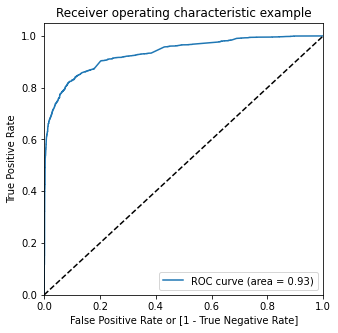

In [162]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


**Roc curve area= 0.93 , which is good**

## Finding optimal cutoff point

In [163]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,IND,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.092591,9000,0,1,0,0,0,0,0,0,0,0,0
1,0,0.077831,6902,0,1,0,0,0,0,0,0,0,0,0
2,0,0.127366,7593,0,1,1,0,0,0,0,0,0,0,0
3,0,0.230638,1498,0,1,1,1,0,0,0,0,0,0,0
4,1,0.982486,4137,1,1,1,1,1,1,1,1,1,1,1


In [164]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378742  1.000000  0.000000
0.1   0.1  0.681269  0.964830  0.508400
0.2   0.2  0.824636  0.908629  0.773431
0.3   0.3  0.868717  0.844815  0.883289
0.4   0.4  0.877781  0.808194  0.920203
0.5   0.5  0.879566  0.776287  0.942529
0.6   0.6  0.875446  0.736403  0.960212
0.7   0.7  0.867756  0.691806  0.975022
0.8   0.8  0.858693  0.647933  0.987179
0.9   0.9  0.842351  0.595722  0.992706


<Figure size 2160x720 with 0 Axes>

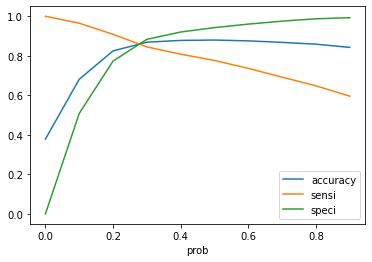

In [165]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize=(30,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

###  0.28 as optimum point to represent the threshold 

### Lets look at the Precision-Recall trade off curve to get the most optimised threshold value

In [166]:
from sklearn.metrics import precision_recall_curve


In [167]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


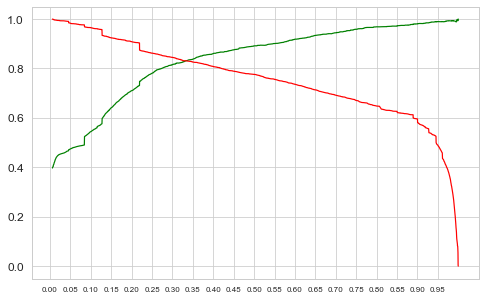

In [168]:
# Plotting the precision recall curve

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)

plt.show()


### It's seen the the optimised threshold is about 0.34

In [169]:
# appoint prediction as 1 for values above 0.34

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,IND,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.092591,9000,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.077831,6902,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.127366,7593,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.230638,1498,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.982486,4137,1,1,1,1,1,1,1,1,1,1,1,1


In [170]:
# Let's check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8732491073880801

In [171]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[4071,  453],
       [ 470, 2288]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
#sensitivity

TP / float(TP+FN)

0.8295866569978245

In [174]:
#specificity

TN / float(TN+FP)

0.899867374005305

In [175]:
#false postive rate

print(FP/ float(TN+FP))

0.10013262599469495


In [176]:
#positive predictive value 

print (TP / float(TP+FP))

0.8347318496898942


In [177]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8964985685972253


### PRECISION AND RECALL

In [178]:
# precision= TP/TP+FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8347318496898942

In [179]:
# recall = TP/TP+FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8295866569978245

## Predictions on TEST SET

In [180]:
X_test.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
3504,3.0,424,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4050,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
7201,2.0,712,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1196,4.0,423,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
8219,7.0,247,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
# Scaling the Test Set using transform

X_test[scale_var] = scaler.transform(X_test[scale_var])
X_test.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
3504,-0.031027,-0.103796,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4050,-1.181802,-0.881059,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
7201,-0.414618,0.424156,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1196,0.352565,-0.105629,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
8219,1.503341,-0.428267,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [182]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       

In [183]:
# removing the undesired variables and using only the vars in the final train test dataset

X_test_sm=X_test_sm[['const','Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']]

### Predictions

In [184]:
# Predicting the final test model 

y_test_pred = logm6_model.predict(X_test_sm)
y_test_pred[:10]


3504    0.010570
4050    0.999342
7201    0.492706
1196    0.010552
8219    0.140165
8747    0.127366
9048    0.749773
6524    0.110345
7693    0.266235
8187    0.462142
dtype: float64

In [185]:
y_pred_1 = pd.DataFrame(y_test_pred)


In [186]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3504,0
4050,1
7201,0
1196,0
8219,1


In [187]:
# adding prospect index as IND

y_test_df['IND'] = y_test_df.index

# Removing index for both dataframes to concat

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [188]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,IND,0
0,0,3504,0.010570
1,1,4050,0.999342
2,0,7201,0.492706
3,0,1196,0.010552
4,1,8219,0.140165


In [189]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,IND,Converted_Prob
0,0,3504,0.010570
1,1,4050,0.999342
2,0,7201,0.492706
3,0,1196,0.010552
4,1,8219,0.140165


### Use 0.34 threshold 

In [190]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Converted,IND,Converted_Prob,final_predicted
0,0,3504,0.010570,0
1,1,4050,0.999342,1
2,0,7201,0.492706,1
3,0,1196,0.010552,0
4,1,8219,0.140165,0


### Accuracy

In [191]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8780889621087314

### Confusion matric

In [192]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_final

array([[1011,  107],
       [ 115,  588]], dtype=int64)

In [193]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [194]:
#sensitivity

TP / float(TP+FN)

0.8364153627311522

In [195]:
#specificity

TN / float(TN+FP)

0.9042933810375671

### Precision


In [196]:
confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1])


0.8460431654676259

**~85% of the predicted conversions have been converted**

### Recall

In [197]:
confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1])


0.8364153627311522

**~84% by the model have been converted correctly**

## ROC

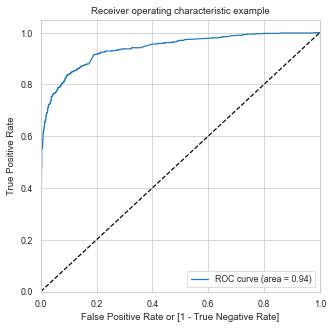

In [198]:
draw_roc( y_pred_final.Converted, y_pred_final.Converted_Prob)

## Lead Scoring


In [199]:
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype('int64')
y_pred_final.sort_values(by='lead_score',ascending=False)


,Converted,IND,Converted_Prob,final_predicted,lead_score
910,1,4297,0.994787,1,99
141,1,8681,0.997991,1,99
577,1,3839,0.994155,1,99
1546,1,6705,0.995000,1,99
571,1,3187,0.999342,1,99
...,...,...,...,...,...
847,0,4870,0.005077,0,0
848,0,1303,0.008622,0,0
1679,0,4372,0.006769,0,0
317,0,1282,0.005329,0,0


### if any new data is to be added we take log odds of the converted probability that we get

## Checking the parameters and variable with highest coefficients

In [200]:
parameters = logm6_model.params[1:]
parameters.sort_values(ascending=False)

Lead Origin_Lead Add Form                   4.471787
Tags_Will revert after reading the email    4.123419
Total Time Spent on Website                 0.950652
Last Activity_Email Opened                 -0.654462
Last Activity_Email Link Clicked           -0.767566
Last Activity_Page Visited on Website      -0.974386
Last Notable Activity_Modified             -1.116981
Last Activity_Email Bounced                -2.064843
Tags_Interested in other courses           -2.438755
Tags_Ringing                               -3.353523
dtype: float64

## Conclusion

What we found out from this are the factor variables that influence the people to become potential clients are
 - origin of highest conversion Lead add form 
 - Tags , where conversion is higher in getting back after reading the mail
 - Total time spent on the website 

Negative coefficients have been observed for :

 - Last activities where ,
     - email was opened,
     
     - email linked was clicked ,
     
     - page visited on the website,
     
     - if the email has bounced .
     
       Hence when these dependent variable decreases , the independent variable increases
     
     
 - Tags when ,
     - selected interest in other courses 
     - Phones been only in ring status 